In [41]:
import pandas as pd
?pd.read_csv

In [128]:
data = pd.read_csv('./train.csv', skipinitialspace=True)

data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

data['Year'] = data.index.year
data['Month'] = data.index.month


store1_data = data[data.Store == 1]

data.head()

/Users/arahuja/anaconda/envs/py34/lib/python3.4/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month
Date,,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1,2015,7
2015-07-31,2,5,6064,625,1,1,0,1,2015,7
2015-07-31,3,5,8314,821,1,1,0,1,2015,7
2015-07-31,4,5,13995,1498,1,1,0,1,2015,7
2015-07-31,5,5,4822,559,1,1,0,1,2015,7


In [127]:
data.index.year

AttributeError: 'Int64Index' object has no attribute 'year'

In [8]:
import seaborn as sb
%matplotlib inline

In [116]:
data[['Sales']].resample('M', how='mean').sort('Sales')

,Sales
Date,
2013-01-31,5211.555578
2013-09-30,5322.988430
2013-05-31,5364.127383
2013-06-30,5402.162960
2013-10-31,5429.258788
2014-01-31,5431.875799
2015-05-31,5472.122002
2013-04-30,5483.749836
2013-02-28,5494.371397


In [79]:
store1_data.index

DatetimeIndex(['2015-07-31', '2015-07-30', '2015-07-29', '2015-07-28',
               '2015-07-27', '2015-07-26', '2015-07-25', '2015-07-24',
               '2015-07-23', '2015-07-22', 
               ...
               '2013-01-10', '2013-01-09', '2013-01-08', '2013-01-07',
               '2013-01-06', '2013-01-05', '2013-01-04', '2013-01-03',
               '2013-01-02', '2013-01-01'],
              dtype='datetime64[ns]', name='Date', length=942, freq=None, tz=None)

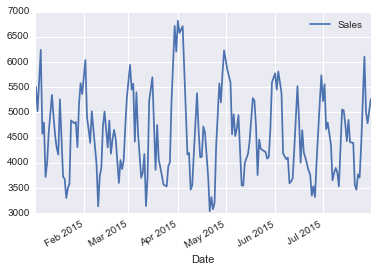

In [160]:
store1_data_2015 = store1_data['2015']
store1_data_2015[
    store1_data_2015.Open==1
][['Sales']].plot()

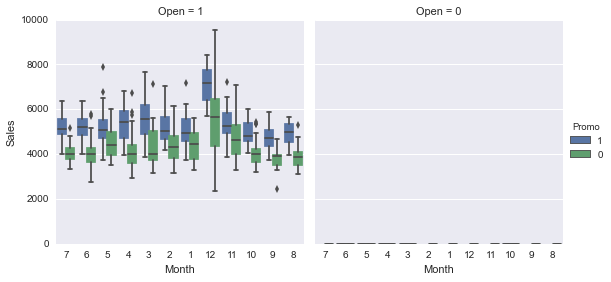

In [129]:
sb.factorplot(
    col='Open',
    hue='Promo',
    x='Month',
    y='Sales',
    data=store1_data, 
    kind='box'
)

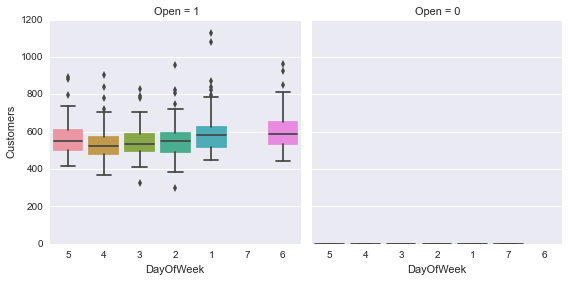

In [86]:
sb.factorplot(
    col='Open',
    x='DayOfWeek',
    y='Customers',
    data=store1_data,
    kind='box',
    
)

In [200]:
pd.rolling_mean(data[['Sales']], window=15, freq='D').diff(1).sort('Sales')

,Sales
Date,
2014-01-01,-773.446039
2015-01-01,-668.394774
2013-12-31,-663.000538
2014-01-05,-596.739073
2014-05-01,-585.158326
2015-01-04,-555.511718
2015-05-14,-551.776143
2013-04-14,-549.940867
2015-04-19,-545.842511


In [153]:
average_daily_customers = data[['Customers']].resample('D', how='mean')
average_daily_sales = data[['Sales', 'Open']].resample('D', how='mean')

In [156]:
average_daily_customers['DiffVsLastWeek'] =average_daily_customers.diff(periods=7)
average_daily_sales['DiffVsLastWeek'] = average_daily_sales[['Sales']].diff(periods=7)

In [158]:
average_daily_sales[average_daily_sales.Open == 1].sort(['DiffVsLastWeek'])

,Sales,Open,DiffVsLastWeek
Date,,,
2013-12-24,4693.101345,1,-7014.515695
2014-12-24,4933.386096,1,-5209.272727
2013-12-09,6822.938117,1,-4811.537220
2013-10-14,5893.636771,1,-4027.798206
2015-04-20,5909.294170,1,-4023.443049
2014-12-08,7016.058824,1,-3975.354011
2014-12-29,7798.316578,1,-3974.561497
2015-06-08,6606.978475,1,-3925.411659
2015-04-08,6090.268161,1,-3866.709417


In [161]:
average_daily_sales = data[['Sales', 'Open']].resample('D', how='mean')

In [163]:
average_daily_sales['Sales'].autocorr(lag=1)

-0.025858276006383577

In [164]:
average_daily_sales['Sales'].autocorr(lag=30)

-0.12984245822530618

In [170]:
pd.expanding_sum(data['Sales'], freq='d')

Date
2013-01-01         87.284560
2013-01-02       6320.315053
2013-01-03      12013.427161
2013-01-04      17967.645995
2013-01-05      23305.397565
2013-01-06      23434.459448
2013-01-07      33144.637027
2013-01-08      40991.665726
2013-01-09      47939.291735
2013-01-10      54891.296219
2013-01-11      62101.436130
2013-01-12      67498.289044
2013-01-13      67627.483663
2013-01-14      72907.114157
2013-01-15      77851.141959
2013-01-16      82598.245098
2013-01-17      87429.244201
2013-01-18      92933.289044
2013-01-19      98323.595771
2013-01-20      98459.559896
2013-01-21     106317.025367
2013-01-22     113779.167968
2013-01-23     120726.758103
2013-01-24     127399.256757
2013-01-25     134377.542856
2013-01-26     139623.076488
2013-01-27     139751.191287
2013-01-28     145023.569762
2013-01-29     149913.854964
2013-01-30     155214.105188
                   ...      
2015-07-02    5272519.084119
2015-07-03    5280169.656316
2015-07-04    5285599.500262
2015-07-0

In [174]:
data['2013-01-01'].Sales.sum()

97235

In [197]:
total_daily_sales = data[['Sales']].resample('D', how='sum')
pd.expanding_sum(total_daily_sales)['2014-12']

,Sales
Date,
2014-12-01,4291837359
2014-12-02,4300681181
2014-12-03,4308939200
2014-12-04,4317493242
2014-12-05,4327295098
2014-12-06,4333774499
2014-12-07,4333970968
2014-12-08,4340530983
2014-12-09,4346860712


In [183]:
total_daily_sales.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10', 
               ...
               '2015-07-22', '2015-07-23', '2015-07-24', '2015-07-25',
               '2015-07-26', '2015-07-27', '2015-07-28', '2015-07-29',
               '2015-07-30', '2015-07-31'],
              dtype='datetime64[ns]', name='Date', length=942, freq='D', tz=None)